In [1]:
using CSV
using Dates
using DataFrames
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../rawdata/output_HHS_US_2021-02-15_one_column.csv"))
filter!(row -> ismissing(row["hospitalization_2021-02-09"]), data);
data

,Column1,hospital_name,ccn,collection_week,fips_code,hospitalization_percentage,ICU_percentages,hospitalization_2021-02-09,target_date,hospitalizations
,Int64,String,String?,Date,Float64,Float64?,Float64?,Float64?,Date,Float64?
1,626,Santa Paula Hospital,missing,2021-02-05,6111.0,missing,0.197368,missing,2021-02-15,missing
2,1804,Prairieville Family Hospital,missing,2021-02-05,22005.0,missing,missing,missing,2021-02-15,missing
3,2524,Select Specialty Hospital - Town and Country,missing,2021-02-05,29189.0,missing,missing,missing,2021-02-15,missing
4,3434,INTEGRIS Community Hospital - Del City,missing,2021-02-05,40109.0,missing,0.0,missing,2021-02-15,missing
5,4021,Legent Hospital for Special Surgery (FKA Star Medical Center),missing,2021-02-05,48085.0,missing,missing,missing,2021-02-15,missing
6,10,PRATTVILLE BAPTIST HOSPITAL,missing,2021-02-05,1001.0,1.0,0.234043,missing,2021-02-10,2.8448
7,11,NORTH BALDWIN INFIRMARY,missing,2021-02-05,1003.0,0.161404,0.1875,missing,2021-02-10,1.37143
8,12,THOMAS HOSPITAL,missing,2021-02-05,1003.0,0.515011,0.203704,missing,2021-02-10,4.37599
9,13,SOUTH BALDWIN REGIONAL MEDICAL CENTER,missing,2021-02-05,1003.0,0.323585,0.55814,missing,2021-02-10,2.74947


In [4]:
mean(xs) = sum(xs) / length(xs);

In [5]:
isbad(x) = isnothing(x) || ismissing(x) || isinf(x) || isnan(x);
skipbad(xs) = filter(x -> !isbad(x), xs);

In [6]:
sum_vals(xs) = sum(skipbad(xs));
mean_vals(xs) = mean(skipbad(xs));

In [7]:
data_total = combine(groupby(data, :target_date), [
    "hospitalizations" => sum_vals => :admissions,
    :ICU_percentages => mean_vals => :icu_pct,
    :hospitalization_percentage => mean_vals => :hosp_pct,
])

,target_date,admissions,icu_pct,hosp_pct
,Date,Float64,Float64,Float64
1,2021-02-15,7488.36,0.214929,0.425554
2,2021-02-10,8236.99,0.21499,0.425554
3,2021-02-11,8079.91,0.21499,0.425554
4,2021-02-12,7969.0,0.21499,0.425554
5,2021-02-13,7597.06,0.21499,0.425554
6,2021-02-14,7444.38,0.21499,0.425554
7,2021-02-16,7346.21,0.21499,0.425554
8,2021-02-17,7255.69,0.21499,0.425554
9,2021-02-18,7141.19,0.21499,0.425554


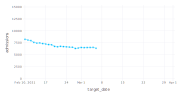

In [8]:
plot(
    data_total,
    x = :target_date,
    y = :admissions,
    Geom.point, Geom.line,
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
    Guide.yticks(ticks=0:2500:15000),
) |> SVG(18cm, 10cm)